$$
\def\com#1{\color{blue}{\textrm{#1}}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>
$\com{Comments from the marker will appear like this. (Please use this notebook to complete your lab).}$

# Laboratory 7

# A. Analytical inversion
In this question you will generate a non-uniform random sequence of number $\{x_i\}$ in the range $[0,L]$ distributed according to the probability distribution

$$P(x)=\frac{e^{-x/\lambda}}{\lambda(1-e^{-L/\lambda})}.\tag{1}$$

You will use the analytical inversion method, and compare it to the rejection sampling method. 

$1.$ Use the analytic inversion method described in lectures to sample (1) by sampling uniform random numbers on the interval $[0,1]$, modifying the normalisation as appropriate. Plot a histogram representing the probability distribution for your transformed random variables, and compare it to (1). Find the mean and standard deviation for a range of values of $\lambda, L, N$(number of samples). Comment on what you find.

$2.$ Use the rejection-sampling method described in lectures to sample the same distribution (1). Validate your sampling by comparing a histogram against (1). 

$\com{some working needed for part 1: there is a slight issue with your inversion formula and if you write out your working you will spot problems}$.

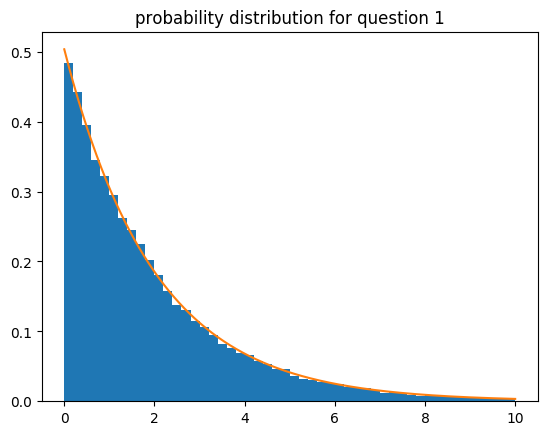

PyObject Text(0.5,1,'probability distribution for question 1')

In [98]:
#Question 1
using PyPlot

#plotting random sampling
N = 50000
x = rand(N);
n = 1:N
λ = 2
L = 10
u(v) = λ*log(1/((e^(-L/λ)-1)*(v - 1/(1 - e^(-L/λ)))))
mydist = u.(x)
nb = 50
plt[:hist](mydist,nb,density=true)

#now plotting analytic solution over it
ni = 0
nf = L
x_a = linspace(ni,nf,N) |> collect
P(x) = (e^(-x/λ))*((1)/(λ*(1 - e^(-L/λ))))
plot(x_a,P.(x_a))
title("probability distribution for question 1")

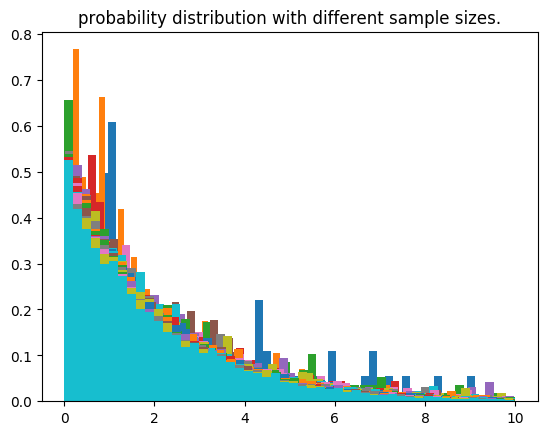

PyObject Text(0.5,1,'probability distribution with different sample sizes.')

In [99]:
#Question 1. Finding mean and std-dev for a range of λ, L, N
using Formatting

#plotting random sampling histogram for range of N's
Nrange = collect(100:100:10000)
stds = Float64[]
means = Float64[]
for n in Nrange
N = n
x = rand(N);
n = 1:N
λ = 2
L = 10
u(v) = λ*log(1/((e^(-L/λ)-1)*(v - 1/(1 - e^(-L/λ)))))
mydist = u.(x)
nb = 50
plt[:hist](mydist,nb,density=true)
append!(stds,std(mydist))
append!(means,mean(mydist))
end
title("probability distribution with different sample sizes.")

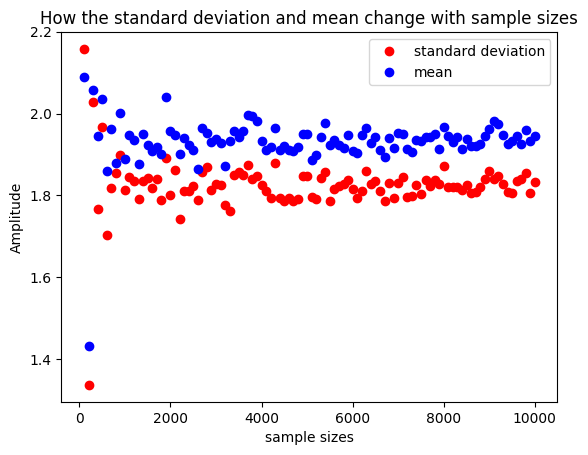

PyObject <matplotlib.legend.Legend object at 0x7f21a6ed4e50>

In [101]:
plot(Nrange,stds,label="standard deviation", "ro")
plot(Nrange,means,label="mean", "bo")
title("How the standard deviation and mean change with sample sizes")
xlabel("sample sizes")
ylabel("Amplitude")
legend()

As one increases N, there is a brief period at the lower sample sizes where the standard deviation and mean are taking many different values and oscillating around. After around 200 samples sizes they mostly converge to a steady values. This suggests that the accuracy of the sample size is low for small sample sizes, nominally < 3000

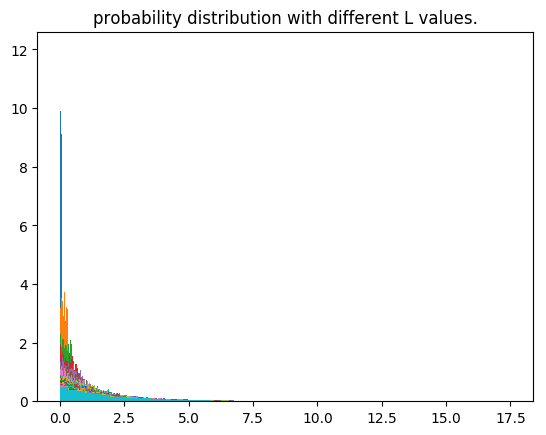

PyObject Text(0.5,1,'probability distribution with different L values.')

In [108]:
#Question 1. Finding mean and std-dev for a range of λ, L, N
using Formatting

#plotting random sampling histogram for range of N's
Lrange = collect(0.1:0.2:18)
stds = Float64[]
means = Float64[]
for L in Lrange
N = 5000
x = rand(N);
n = 1:N
λ = 2
u(v) = λ*log(1/((e^(-L/λ)-1)*(v - 1/(1 - e^(-L/λ)))))
mydist = u.(x)
nb = 50
plt[:hist](mydist,nb,density=true)
append!(stds,std(mydist))
append!(means,mean(mydist))
end
title("probability distribution with different L values.")

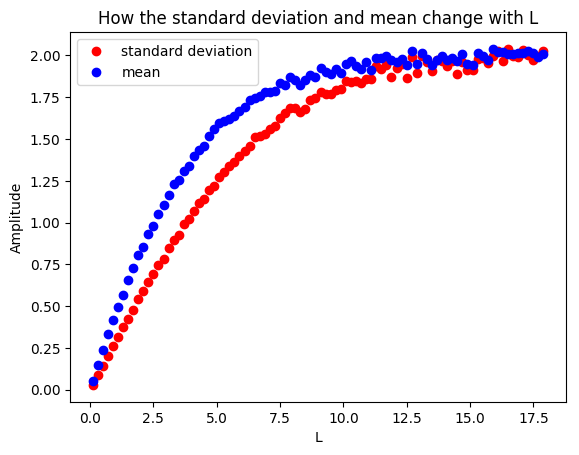

PyObject <matplotlib.legend.Legend object at 0x7f2195310610>

In [109]:
plot(Lrange,stds,label="standard deviation", "ro")
plot(Lrange,means,label="mean", "bo")
title("How the standard deviation and mean change with L")
xlabel("L")
ylabel("Amplitude")
legend()

The probability distribution follows an exponentially decreasing curve. As L increases, the part of the curve that the code is sampling from follows the decreasing line until the mean and standard deviation converge to a set value once L reaches 10 and the area under the curve past that becomes zero. This suggests that to get an accurate probability distribution one must sample from L > 10

$\com{correctly normalized distirubiton is valid for any $L$}$

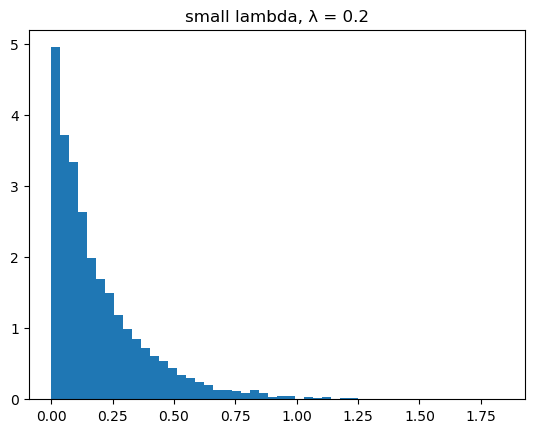

PyObject Text(0.5,1,u'small lambda, \u03bb = 0.2')

In [21]:
λ = 0.2
L = 50
N = 5000
x = rand(N);
n = 1:N
u(v) = λ*log(1/((e^(-L/λ)-1)*(v - 1/(1 - e^(-L/λ)))))
mydist = u.(x)
nb = 50
plt[:hist](mydist,nb,density=true);
title("small lambda, λ = 0.2")

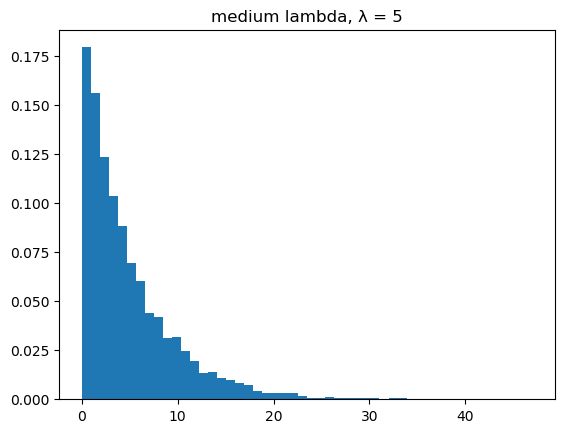

PyObject Text(0.5,1,u'medium lambda, \u03bb = 5')

In [22]:
λ = 5
L = 50
N = 5000
x = rand(N);
n = 1:N
u(v) = λ*log(1/((e^(-L/λ)-1)*(v - 1/(1 - e^(-L/λ)))))
mydist = u.(x)
nb = 50
plt[:hist](mydist,nb,density=true);
title("medium lambda, λ = 5")

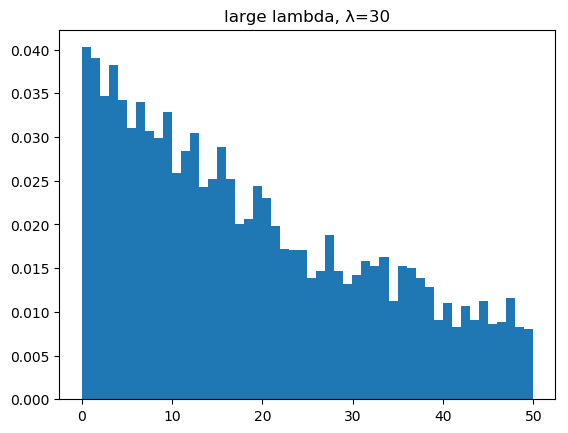

PyObject Text(0.5,1,u'large lambda, \u03bb=30')

In [23]:
λ = 30
L = 50
N = 5000
x = rand(N);
n = 1:N
u(v) = λ*log(1/((e^(-L/λ)-1)*(v - 1/(1 - e^(-L/λ)))))
mydist = u.(x)
nb = 50
plt[:hist](mydist,nb,density=true);
title("large lambda, λ=30")

As one can see, as one increases $\lambda$, the probability distribution loses its characteristic shape and thus the sampling becomes inaccurate

$\com{as above: still valid, but on a finite interval (if correctly normalized)}$

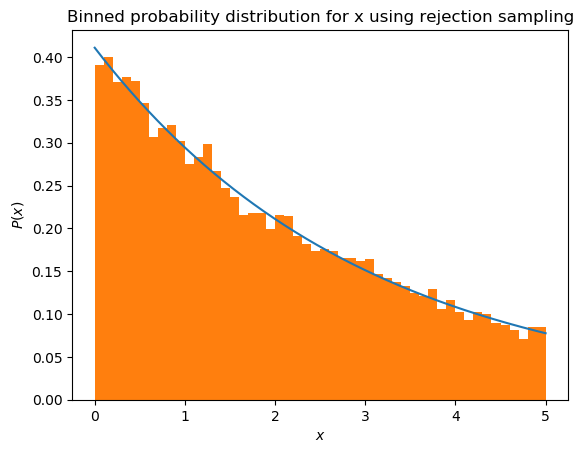

PyObject Text(0.5,1,'Binned probability distribution for x using rejection sampling')

In [24]:
#Question 2, rejection sampling
using PyPlot
λ = 3
L = 5
ni = 0
nf = L
N= 1000
x_a = linspace(ni,nf,N) |> collect
P(x) = (e^(-x/λ))*((1)/(λ*(1 - e^(-L/λ))))
asol = P.(x_a)
plot(x_a,abs.(asol))

function reject(P,w,Pmax,N)
    samples = Array{Float64}(0) #initialize empty array
    while length(samples) < N
        y = w[1] + rand()*(w[2]-w[1])
        z = rand()*Pmax
        z < P(y) && push!(samples,y)
    end
    return samples
end

xx = reject(P,(0,L),0.6,20000);
nb =50
plt[:hist](xx,nb,density=true); #this normalization will be the ones you use most often
xlabel(L"x");ylabel(L"P(x)");title("Binned probability distribution for x using rejection sampling")

# B. Sampling thermal states
Consider a mass $m$ resting on a frictionless plane, attached to a rigid mount by a spring with spring constant $k$. The energy of the mass at position $x$ with momentum $p$ is

$$E(x,p)=\frac{p^2}{2m}+V(x)$$

where the potential energy is

$$V(x)=\tfrac{1}{2}kx^2$$

In thermal equilibrium with an energy reservoir at temperature $T$, the probability distriubtion for the position and momentum of the mass is 

$$P(x,p)=\frac{e^{-\beta E(x,p)}}{Z}\tag{Canonical distribution}$$

where as usual the normalization factor

$$Z=\int dx\int dp\; e^{-\beta E(x,p)}$$

ensures $\int dx\int dp\;P(x,p)\equiv 1$. Here $\beta=1/k_BT$ and $k_B$ is Boltzman's constant. 

$1$. Evaluate the normalization integral for $Z$.

$2$. Hence show that the distribution factorizes as 

$$P(x,p)\equiv P_x(x)P_p(p)$$

and give the two distributions. The probabilities for finding the mass in a particular interval of $x$ or $p$ are thus independent. 

$3$. Sample the distirbutions for $P_x(x)$, $P_p(p)$, for parameters (in S.I. units) $k=10^{-6}$, $m=10^{-3}$, $T=3$, and $N=5000$ samples. Make a well-labeled plot comparing histograms of your data with the analytical distributions over the interval $x\in[-5x_0,5x_0]$ where $x_0=\sqrt{k_B T/m\omega^2}$, for a well-chosen number of bins. You will need to work out how to rescale the samples from `randn()` to sample a Gaussian distribution of arbitrary width.

$4.$ Now we imagine the mass is moving in the potential

$$U(x)=\frac{m}{2}\omega^2x^2+V_0e^{-(x-a)^2/2\sigma^2}$$

The potential is too complicated to use the analtytical inversion method discussed in lectures, so you will need to proceed numerically. Make a well-labeled plot of the potential Use the parameters $V_0=2\times 10^{-22}$, $\sigma=3\times 10^{-9}$ and $a=8\times 10^{-9}$. Make a well labeled plot of the potential for $x\in [-5x_0,5x_0]$.

$5.$ Use rejection sampling to create > $N=10^4$ samples from $P_x(x)$ for the new potential over the sample interval, for the same parameters used above. Compare your histogram with $P_x(x)$.

$6.$ Repeate the procedure at the higher temperature $T=7$. Comment.

$7.$ Evaluate the mean of the kinetic and potential energies and compare the energies to $k_BT/2$. The equipartition theorem says that for this system, the following relation should hold:
$$\langle x\frac{\partial U(x)}{\partial x}\rangle=k_BT,$$
where $\langle\cdot\rangle$ denotes the ensemble average.
Test the equipartion theorem for your rejection-sampled data.

# Part B Answers

1.
Normalization integral is a gaussian integral: 
Answer is $$Z = \sqrt{\frac{2\pi}{\beta k}}\sqrt{\frac{2m\pi}{\beta}} = \frac{1}{{\frac{\beta}{2\pi} \sqrt{\frac{k}{m}}}}$$

2.
We can separate $P(x,p)$ into $P_x(x)P_p(p)$ like so:
$$P_x(x)P_p(p) = \sqrt{\frac{2\pi}{\beta k}}\sqrt{\frac{2m\pi}{\beta}}e^{\frac{-\beta k x^{2}}{2}}e^{\frac{-\beta p^2}{2 m}}$$

$$P_x(x) = \sqrt{\frac{2\pi}{\beta k}}e^{\frac{-\beta k x^{2}}{2}}$$
$$P_p(p) = \sqrt{\frac{2m\pi}{\beta}}e^{\frac{-\beta p^2}{2 m}}$$

$\com{if $Z\sim 1/\beta$, then $P_x(x)\sim \sqrt{\beta}$ (definition is to divide by $Z$)}$

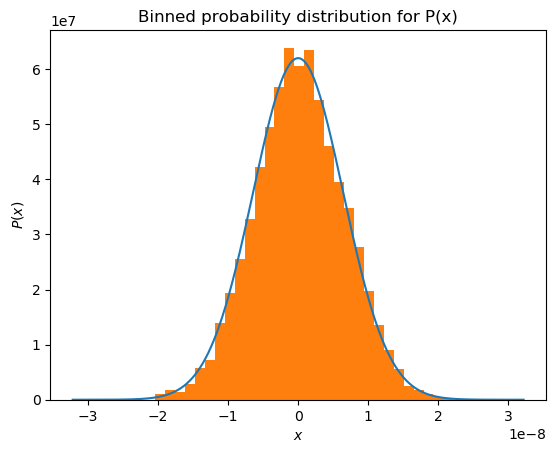

PyObject Text(0.5,1,'Binned probability distribution for P(x)')

In [47]:
#Question 3, rejection sampling
using PyPlot
#defining constants
k = 1*10^(-6.0)
m = 1*10^(-3.0)
T = 3
k_b = 1.38*1e-23
β = 1/(T*k_b)
#making vectors
xo =sqrt(1/(β*k))
ni = -5*xo
nf = 5*xo
N= 5000
x_a = linspace(ni,nf,N) |> collect
P(x) = (1/sqrt((2π)/(β*k)))*e^(-(β*k*x^2)/(2))
asol = P.(x_a)
plot(x_a,asol)

function reject(P,w,Pmax,N)
    samples = Array{Float64}(0) #initialize empty array
    while length(samples) < N
        y = w[1] + rand()*(w[2]-w[1])
        z = rand()*Pmax
        z < P(y) && push!(samples,y)
    end
    return samples
end

xx = reject(P,(ni,nf),maximum(asol),5000);
nb =30
plt[:hist](xx,nb,density=true); #this normalization will be the ones you use most often
xlabel(L"x");ylabel(L"P(x)");title("Binned probability distribution for P(x)")

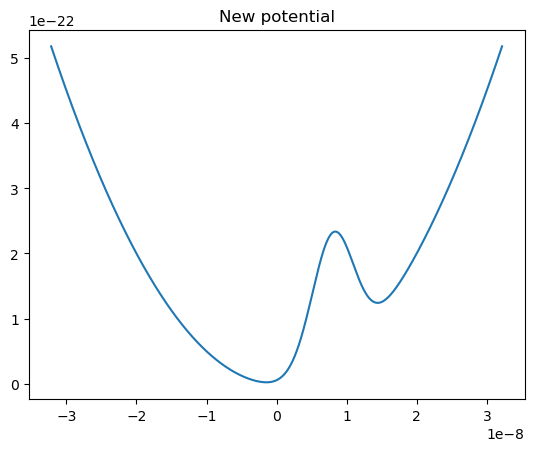

4.5000000000042e-22


In [48]:
#Question 4
using PyPlot

#defining constants
Vo = 2*1e-22
σ = 3*1e-9
a = 8*1e-9
k = 1*1e-6
m = 1*1e-3
T = 3
β = 1/(T*1.38*1e-23)

#making vectors
xo =sqrt(1/(β*k))
ni = -5*xo
nf = 5*xo
N= 5000
x_a = linspace(ni,nf,N) |> collect

#making function
U(x) = 0.5*k*x^(2.0) + Vo*exp(-((x-a)^2)/(2*σ^(2.0)))

asol = U.(x_a)
plot(x_a,asol)
title("New potential")
println(U(3e-8))

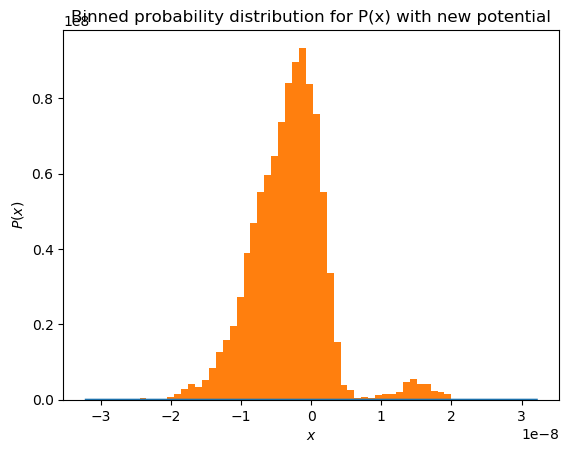

0.1603740649812059


In [49]:
#Question 5
#making vectors
xo =sqrt(1/(β*k))
ni = -5*xo
nf = 5*xo
N= 5000
x_a = linspace(ni,nf,N) |> collect
#here A is the normalization constant
P(x) = exp(-β*(0.5*k*x^(2.0) + Vo*exp(-((x-a)^2)/(2*σ^(2.0)))))
asol = P.(x_a)
plot(x_a,asol)

function reject(P,w,Pmax,N)
    samples = Array{Float64}(0) #initialize empty array
    while length(samples) < N
        y = w[1] + rand()*(w[2]-w[1])
        z = rand()*Pmax
        z < P(y) && push!(samples,y)
    end
    return samples
end

xx = reject(P,(ni,nf),maximum(asol),5000);
nb =50
plt[:hist](xx,nb,density=true); #this normalization will be the ones you use most often
xlabel(L"x");ylabel(L"P(x)");title("Binned probability distribution for P(x) with new potential")
println(mean(asol))

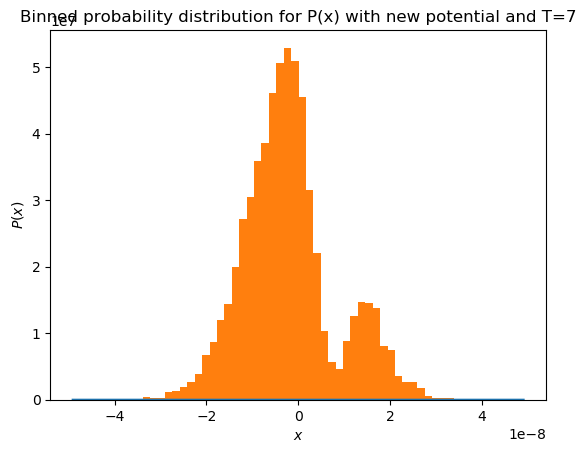

0.18974289289556165


In [50]:
#Question 5
#making vectors & new T
T = 7
β = 1/(T*1.38*1e-23)
xo =sqrt(1/(β*k))
ni = -5*xo
nf = 5*xo
N= 5000
x_a = linspace(ni,nf,N) |> collect
P(x) = exp(-β*(0.5*k*x^(2.0) + Vo*exp(-((x-a)^2)/(2*σ^(2.0)))))
asol = P.(x_a)
plot(x_a,asol)

function reject(P,w,Pmax,N)
    samples = Array{Float64}(0) #initialize empty array
    while length(samples) < N
        y = w[1] + rand()*(w[2]-w[1])
        z = rand()*Pmax
        z < P(y) && push!(samples,y)
    end
    return samples
end

xx = reject(P,(ni,nf),maximum(asol),5000);
nb =50
plt[:hist](xx,nb,normed=true); #this normalization will be the ones you use most often
xlabel(L"x");ylabel(L"P(x)");title("Binned probability distribution for P(x) with new potential and T=7")
println(mean(asol))

When one increases the temperature and thus the energy of the system, there is a higher probability of being in the higher energy potential well to the right. Thus we see a spike in the probability distribution on the right hill.

7.
We must find the derivative of U(x) and then multiply this by x, feed the data into it and then take the mean of this result.

In [52]:
#Question 4
using PyPlot
using Base.Test
T = 8
β = 1/(T*k_b)
xx = reject(P,(ni,nf),maximum(asol),5000);
#making function
U(x) = k*x + Vo*((a-x)/(σ^(2.0)))*exp(-((x-a)^2)/(2*σ^(2.0)))
final(x) = U(x)*x
result = final.(xx)
mean(result), k_b*T

(1.0753547202239622e-22, 1.1039999999999998e-22)

# C. Ising Model
In part C you will build on some existing code to systematically study the states of a physical system as as a function of a given parameter (in this case temperature). 

<div style="width: 700px;">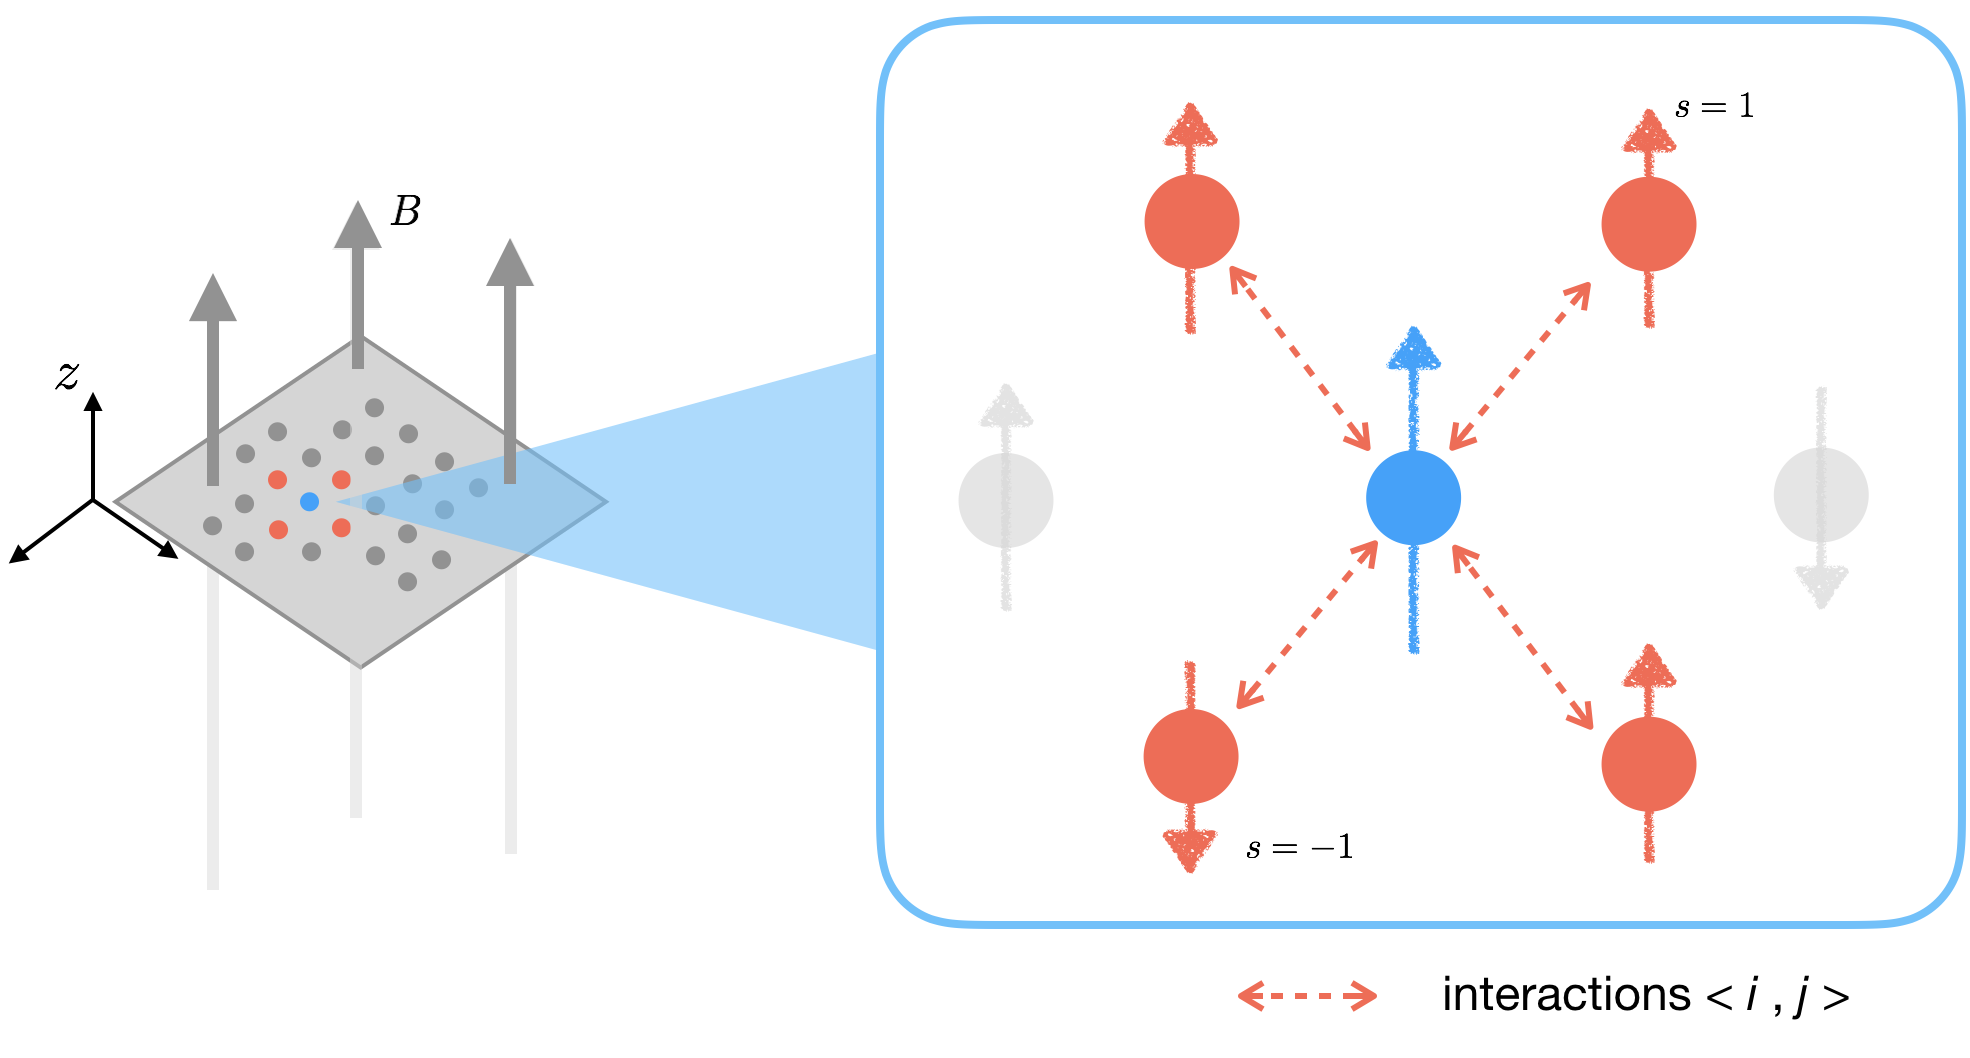</div>

In this part of the lab we will explore the 2D Ising model with Hamiltonian
$$H=-J\sum_{\langle i,j\rangle}s_is_j-U\sum_i s_i$$
where each spin, $s_i$, can be $\pm1$, and $\langle i,j\rangle$ denotes the sum over nearest neighbours. 

- $J$ models nearest neighbour interactions between magnetic dipoles.
- $U$ models the interaction of each spin with an external magnetic field.

We will use the Markov-Chain Monte-Carlo numerical method introduced in lectures. The central idea is that the MCMC allows us to sample the ___canonical distribution___ for the Ising model, corresponding to immersing the 2D lattice of spins into a large reservoir with fixed temperature $T$.

- For ferromagnetic material $J>0$. __We will consider the case $J=1$ and $U\equiv 0$.__
- If we quench the system by starting at high temperature and then evolving the markov chain for a new lower temperature, we can expect that a random initial state will evolve to have local order where nearby domains collectively form macroscopic regions with net magnetization.

We will start with the Markov Chain code from the lecture on the Ising model, reproduced below. We consider a 2D array of spins that is doubly periodic so that each boundary spin has a $J$ coupling term that wraps around to the other boundary:
<div style="width: 400px;">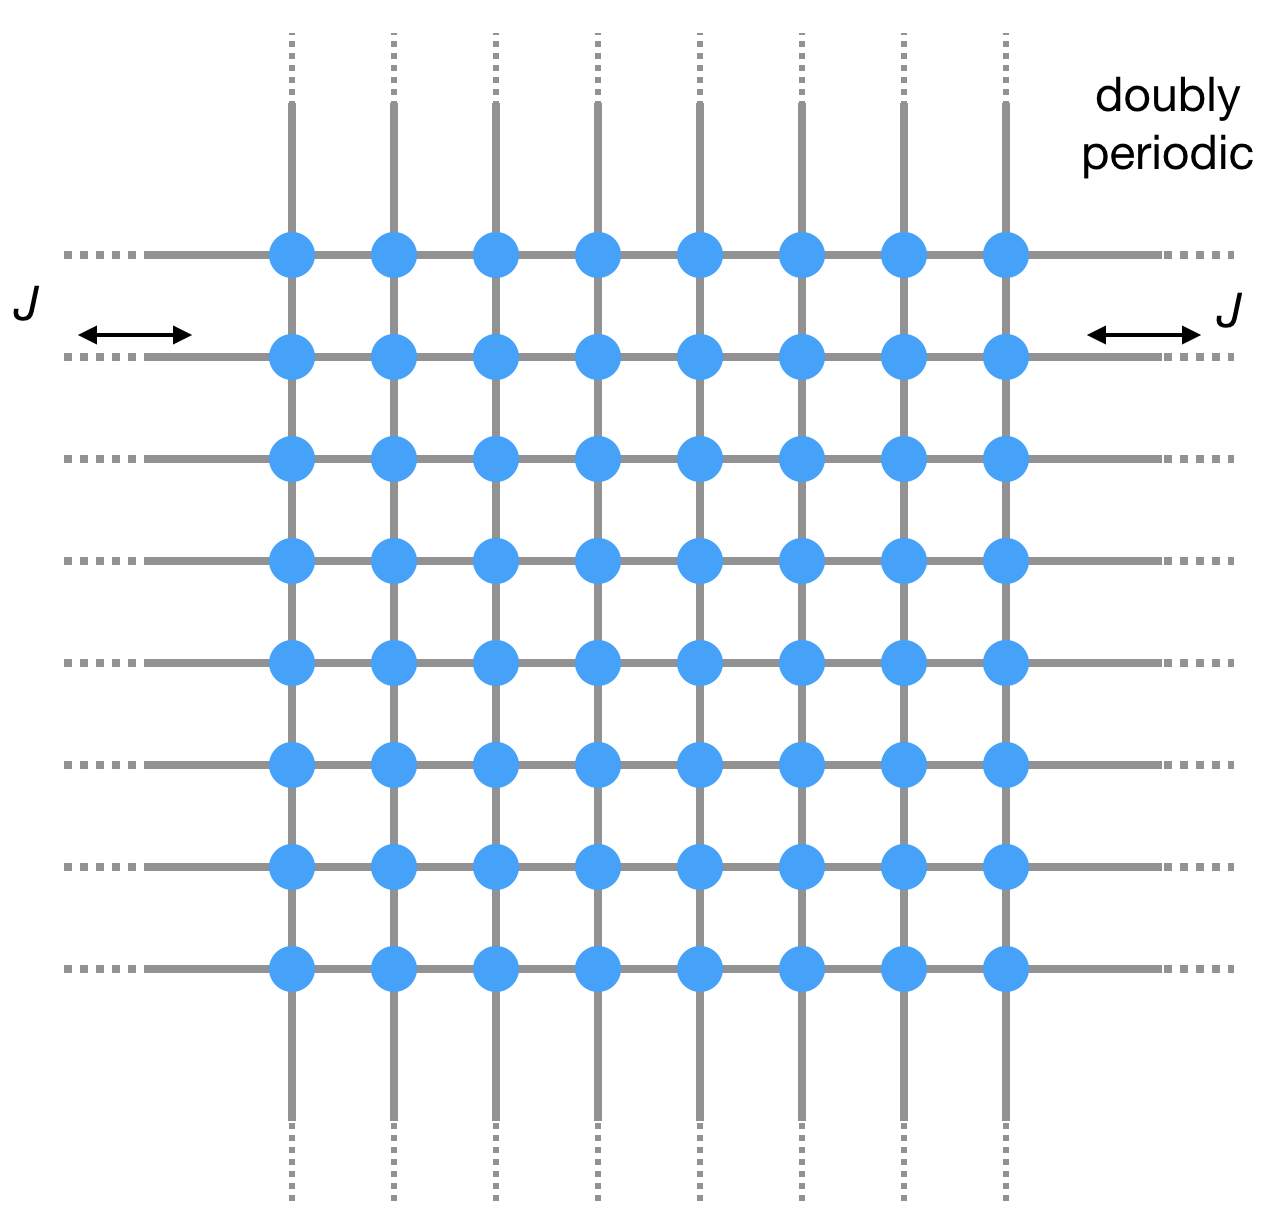</div>

You should start by running the following code to get a feel for what it is doing. 

In [2]:
right = (0,1)
left = (0,-1)
down = (1,0)
up = (-1,0)
J = 1.0
#you can also work in units where kB=1

1.0

In [3]:
function energy(S)
    #J = 1 for nearest neighbours, J = 0 otherwise.
    sum(-S.*(
            circshift(S,right).+
            circshift(S,down))) #shift along x and y, and don't double count
end

energy (generic function with 1 method)

In [4]:
#Flip a single spin with the modified Metropolis rate
function flipspin(s,ΔE,β)
    α = 0.3
    if ΔE < 0
        rand() < α ? (return -s) : (return s)
    else
        rand() < α*exp(-β*ΔE) ? (return -s) : (return s)
    end
end

flipspin (generic function with 1 method)

In [5]:
#step entire lattice one step forward in "time" along the Markov chain
function step!(S,β)
    ΔE = 2.*S.*(
        circshift(S,right).+
        circshift(S,left).+
        circshift(S,down).+
        circshift(S,up))
    
    for i in eachindex(S)
        S[i] = flipspin(S[i],ΔE[i],β)
    end
    return
end

step! (generic function with 1 method)

In [6]:
showspin(s) = s > 0 ? print("◙") : print("☉")

showspin (generic function with 1 method)

In [7]:
function showlattice(S)
    N, M = size(S)
    for i in 1:N
        for j in 1:M
            showspin(S[i, j])
        end
        print("\n")
    end
end

showlattice (generic function with 1 method)

In [8]:
# we can pass any set of numbers to rand() to be drawn from uniformly
S = rand([1.0, -1.0], (30, 30)) #s = ±1 with equal probability
T = 3.0

for i in 1:100
    step!(S, 1.0/T)
    showlattice(S)
    sleep(0.1)   
    IJulia.clear_output(true)
end

☉☉☉◙◙◙◙◙◙☉◙◙◙◙◙◙◙☉◙☉☉◙◙◙◙☉◙☉☉☉
☉☉☉◙◙☉◙◙◙◙◙◙☉☉◙◙◙◙☉◙◙◙☉◙☉◙◙◙◙☉
☉☉☉☉◙◙◙◙◙☉◙◙◙◙◙☉☉◙☉☉◙☉☉☉☉◙☉◙◙☉
☉☉☉◙☉☉◙☉◙☉◙◙◙☉◙◙☉☉☉☉◙☉☉☉☉☉◙☉☉☉
☉☉☉◙☉◙☉☉☉☉◙◙◙◙◙◙☉◙☉☉☉☉◙◙☉☉◙☉☉◙
◙☉◙◙☉◙☉◙◙☉◙◙◙◙◙◙◙◙◙◙☉☉◙◙☉☉◙◙◙◙
◙◙◙☉◙☉☉☉☉◙◙◙◙◙◙◙◙◙◙◙◙◙◙◙☉☉☉◙◙◙
◙☉◙◙☉◙◙☉◙◙◙◙◙◙◙◙☉◙◙◙◙◙◙☉◙◙☉◙◙◙
◙◙◙◙☉◙◙◙☉☉◙◙◙◙☉◙◙◙☉☉◙◙◙◙◙◙☉◙◙◙
◙◙☉☉◙◙◙☉☉☉◙◙◙◙◙◙◙◙☉◙◙◙◙◙◙◙☉◙◙◙
◙☉☉☉☉◙☉☉☉☉◙☉◙◙☉☉◙☉☉◙◙◙◙◙◙◙◙☉◙◙
◙◙◙◙◙☉◙☉◙☉◙◙◙◙◙☉☉☉☉☉◙◙◙◙◙◙◙◙◙◙
◙◙☉☉◙◙◙☉☉◙☉☉☉☉☉☉☉☉☉◙◙◙◙◙◙◙◙◙☉◙
◙◙☉☉◙◙◙◙☉☉☉◙☉☉☉☉☉☉☉☉☉◙☉◙◙☉◙◙◙◙
◙◙☉☉☉☉☉◙◙☉☉◙☉☉☉◙◙◙◙◙◙◙◙☉☉◙◙◙◙◙
☉☉☉☉☉☉◙◙◙☉◙☉☉◙◙◙◙◙☉☉☉☉☉☉☉☉◙◙◙◙
◙◙◙☉◙☉☉◙☉☉◙☉◙◙◙◙☉◙◙☉☉☉☉☉☉◙◙◙◙◙
◙◙◙☉◙☉☉◙☉◙◙☉☉☉◙☉◙◙☉☉☉☉◙☉☉☉◙☉◙◙
◙◙◙☉◙◙☉◙☉◙◙☉◙☉☉☉◙◙◙☉☉☉☉◙◙◙◙◙☉◙
◙☉☉☉◙◙◙◙◙◙◙☉☉☉☉☉☉◙◙◙☉☉◙◙◙◙☉◙◙◙
◙☉◙◙◙◙◙◙◙◙◙◙☉☉☉☉☉◙☉◙◙◙◙◙◙◙☉◙◙◙
◙◙◙☉◙◙◙◙◙◙☉☉☉☉☉☉☉☉◙☉◙◙◙◙☉◙☉◙◙◙
◙◙☉☉◙◙◙◙◙◙☉☉☉☉◙◙☉☉☉☉☉◙◙☉☉☉☉◙◙◙
◙☉◙☉☉☉◙◙☉◙☉☉◙◙◙☉☉☉☉☉◙◙◙☉◙☉☉◙◙◙
◙◙☉☉◙☉◙◙☉☉☉◙◙◙☉☉☉☉☉☉☉◙☉◙☉☉◙☉◙☉
◙◙◙☉◙☉◙◙◙☉☉◙◙☉☉☉◙☉☉☉◙◙☉☉☉◙◙☉☉◙
◙☉☉☉☉☉☉☉☉☉☉☉◙◙◙☉☉◙◙◙◙☉☉◙◙◙◙◙☉◙
☉☉☉☉☉◙◙◙☉☉◙◙◙◙◙☉☉◙◙☉◙◙☉☉☉☉◙◙☉◙
☉☉☉☉◙◙◙◙◙◙◙◙◙☉☉☉◙◙◙☉☉☉☉◙◙☉☉☉☉◙
☉☉☉☉☉☉☉◙◙◙◙◙◙◙◙◙◙◙◙☉☉☉◙☉☉☉☉◙☉◙


$1.$ Write a function `energyAverages(S,β,Ns)` that takes an initial state of the lattice `S` (an array with entries $\pm 1$) and uses the above functions to compute `Ns` steps of the Markov Chain (samples of the canonical distribution), computing and saving the energy of each state of the lattice for each S. The function can modify `S` but should only return the mean and variance of the lattice energy over all the states of the Markov Chain. You may find the function `push!` useful. 

$2.$ Write a function `sweep(Nspin,Trange,NsperT)`:
- `Nspin` - size of lattice along one edge (total of `Nspin x Nspin` spins)
- `Trange` - vector of temperatures at which to call `energyAverages`
- `NsperT` - number of samples per temperature. 

The function should initialise the lattice with a completely random state ($T\to\infty$) and then sweep down through your chosen temperatures $T$, computing and saving the average energy and energy variance for each temperature. Have your function return only these two vectors.

$3.$ Call your function `sweep` for $T\in [1.0,4.0]$ using 60 equally spaced points, for a $20\times20$ lattice, using $20000$ samples per temperature. Make a well-labeled plot of the mean energy versus temperature. Calcuate the specific heat of the Ising model at each temperature

$$C_v=\frac{\langle E^2\rangle-\langle E\rangle^2}{T^2}$$

and plot this on the same graph. In an infinite system this quantity diverges near the phase transition (finite size systems exhibit "cross-over" behavior insteady of strict divergences). Compare your results to Onsager's prediction (1944) for the critical temperature of the 2D Ising model
$$T_c=\frac{2J}{k_B\log{(1+\sqrt{2})}}\approx \frac{J}{k_B}2.2691\dots$$

Does your MCMC sampling agree with Onsager?

In [9]:
#QUESTION 1
using Formatting

function energyAverages(S,β,Ns)
    N = size(S)[1]
    ENS=Float64[]
    for i=1:Ns
        push!(ENS,energy(S))
        step!(S,β)
    end
    return mean(ENS)/(N^(2)), var(ENS)/(N^(2))
end

T = 20
energyAverages(rand([-1.0,1.0], (N,N)),1/T,100)

(-0.058911111111111115, 2.595733333333333)

In [10]:
#QUESTION 2
function sweep(Nspin,Trange,NsperT)
    S_0 = rand([1.0, -1.0], (Nspin, Nspin))
    E_m = []
    E_var = []
    tstep = reverse(Trange)
    for T in tstep
        β = 1/T
        m, v = energyAverages(S_0,β,NsperT)
        push!(E_m,m)
        push!(E_var,v)
    end
    return reverse(E_m), reverse(E_var)
end

sweep (generic function with 1 method)

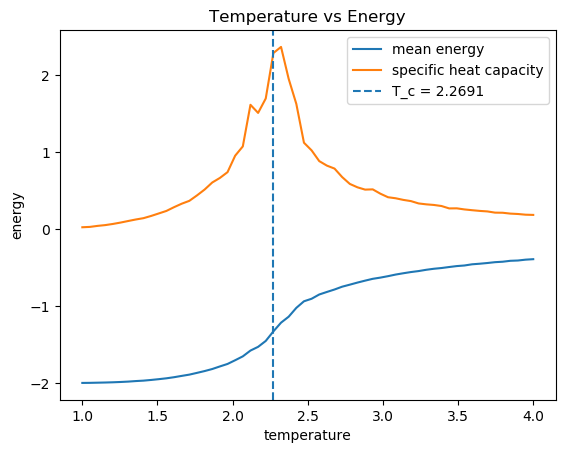

PyObject <matplotlib.legend.Legend object at 0x7f2d92d2cb10>

In [20]:
#QUESTION 3
using PyPlot
ni = 1.0
nf = 4.0
N = 60
trange = linspace(ni,nf,N)
result = sweep(20,trange,20000)
plot(trange, result[1],label="mean energy")
xlabel("temperature")
ylabel("energy")
title("Temperature vs Energy")
T_c = 2.2691

#now plotting specific heat capacity of system
plot(trange,result[2]./(trange.^2),label="specific heat capacity")
axvline(T_c,label="T_c = 2.2691",linestyle="dashed")
legend()

This plot for specific heat capacity makes sense as at the phase transition we can pump energy into the state without changing the temperature. At the middle of the phase transition is when the critical temperature occurs. This is the point at which the material is equally likely to go to either phase.

The MCMC sampling does agree with onsager. We can see that the critical temperature at which the phase transition is predicted to occur $T \approx 2.27$ is when the temperature shifts into the second state. This corresponds to magnetic domains being formed in the material as the spin states in the magnet cluster.

$\com{Nice work. Some interpretation in part A and B needs attention, but the results are sound. 21/25}$